# Modelos


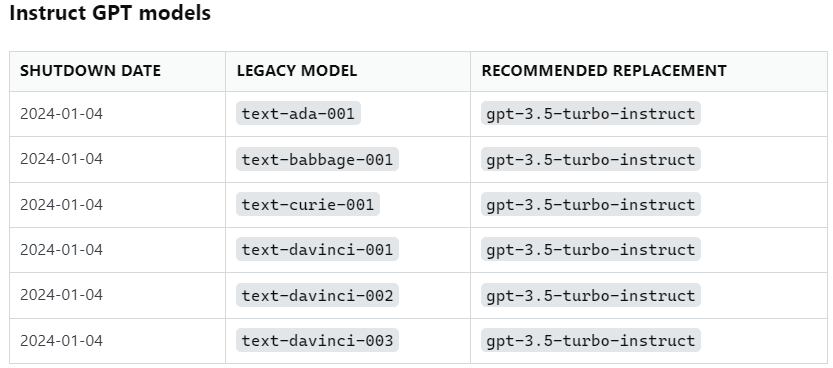

https://stackoverflow.com/questions/77789886/openai-api-error-the-model-text-davinci-003-has-been-deprecated

Estos son los modelos que se encargarán de procesar nuestro texto.

In [8]:
from langchain.llms import LlamaCpp, OpenAI
import config
import os

In [9]:
api = os.environ['OPENAI_API_KEY'] = config.OPENAI_API_KEY

In [10]:
llm_openai = OpenAI(model_name="gpt-3.5-turbo-instruct", openai_api_key=api)
#llm_llama = LlamaCpp(model_path="./llamacpp/models/7B/ggml-model-q4_0.bin")

In [11]:
respuesta_openai = llm_openai("Hola, como estas?")
#respuesta_llama = llm_llama("Hola, como estas?")

In [12]:
print(respuesta_openai)
#print(respuesta_llama)



Soy una inteligencia artificial, no tengo emociones ni estado físico, pero siempre estoy aquí para ayudarte. ¿En qué puedo servirte?


## Modelos Chat

### ChatGTP

Los modelos que utilizamos eran para completar texto, sin embargo podemos tambien usar modelos especificos para chat como ChatGPT.

In [13]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage

In [14]:
chatgpt = ChatOpenAI(openai_api_key=api)

C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [15]:
respuesta = chatgpt([HumanMessage(content="Hola, como estas?")])
print(respuesta)

C:\Users\Marco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


content='Hola! Estoy aquí para ayudarte, ¿en qué puedo asistirte hoy?' response_metadata={'finish_reason': 'stop', 'logprobs': None}


In [16]:
respuesta

AIMessage(content='Hola! Estoy aquí para ayudarte, ¿en qué puedo asistirte hoy?', response_metadata={'finish_reason': 'stop', 'logprobs': None})

In [17]:
respuesta.content

'Hola! Estoy aquí para ayudarte, ¿en qué puedo asistirte hoy?'

# Prompts
El prompt es el texto que se le envía al modelo. El éxito de los prompts está en que cuenten con una buena estructura y que den suficiente contexto el modelo para que entienda que esperamos de respuesta.
Cada prompt que le enviemos al modelo debe de tener una estructura similar, Langchain tiene un par de herramientas que nos facilitas esto.

In [18]:
# En este template solo tenemos que poner el promt y entre llaves {} pones las variables
# que quieres que se reemplacen
from langchain import PromptTemplate

template_basico = """Eres un asistente virtual culinario que responde a preguntas
de manera muy breve.

Pregunta: Cuales son los ingredientes para preparar {platillo}

Respuesta:"""

In [19]:
#Constuimos el template, especificandole cuales son las variables de entrada y cual es el texto que tiene que usar
prompt_temp = PromptTemplate(input_variables=["platillo"], template = template_basico)

#Aqui podemos ver como se reemplaza la variable platillo por tacos al pastor
promt_value = prompt_temp.format(platillo="tacos al pastor")
print(promt_value)

Eres un asistente virtual culinario que responde a preguntas
de manera muy breve.

Pregunta: Cuales son los ingredientes para preparar tacos al pastor

Respuesta:


In [20]:
respuesta_openai = llm_openai(promt_value)
print(respuesta_openai)

 Para preparar tacos al pastor necesitas carne de cerdo, achiote, chiles guajillo, chiles ancho, ajo, vinagre, piña, cebolla, cilantro, limón y tortillas de maíz.


In [21]:
# Se puede revisar el numero de tokens de un prompt en especifico
# Solo requieres instalar tiktoken con pip install tiktoken
llm_openai.get_num_tokens(promt_value)

41

# ChatPromptTemplates
AL igual que tenemos templates para modelos abiertos, LangChain tambien nos brinda templates para modelos de chat. Estos templates nos ayudan a darle la informacion a los modelos de chat en la manera en la que lo necesitan.

Los elementos de estos templates son:
* **Human**: El texto que escribimos nosotros
* **AI**: El texto que responde el modelo
* **System**: El texto que se le envía al modelo para darle contexto de su funcionamiento

In [22]:
from langchain.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate, ChatPromptTemplate, AIMessagePromptTemplate

In [23]:
# Armemos el template para el sistema
prompt_temp_sistema = PromptTemplate(
    template="Eres un asistente virtual que me recomienda una alternativa {adjetivo} a un producto",
    input_variables=["adjetivo"],
)

template_sistema = SystemMessagePromptTemplate(prompt=prompt_temp_sistema)

#Ahora para el humano
prompt_temp_humano = PromptTemplate(template="{texto}", input_variables=["texto"])
template_humano = HumanMessagePromptTemplate(prompt=prompt_temp_humano)

In [24]:
chat_prompt = ChatPromptTemplate.from_messages([template_sistema, template_humano])

# Este es el formato del prompt que acabamos de armar
chat_promt_value = chat_prompt.format_prompt(adjetivo="economica", texto="ipad").to_messages()
print(chat_promt_value)

[SystemMessage(content='Eres un asistente virtual que me recomienda una alternativa economica a un producto'), HumanMessage(content='ipad')]


In [25]:
chat_resp = chatgpt(chat_promt_value)
print(chat_resp)

content='Una alternativa económica al iPad podría ser una tablet de una marca menos conocida, como por ejemplo la Amazon Fire HD 10. Esta tablet ofrece funcionalidades similares a las del iPad a un precio más asequible. También puedes considerar tablets de marcas como Samsung, Lenovo o Huawei, que suelen tener modelos de buena calidad a un precio más accesible que el iPad. ¡Espero que encuentres la opción que mejor se adapte a tus necesidades y presupuesto!' response_metadata={'finish_reason': 'stop', 'logprobs': None}


# Example selector
Cuando estamos usando un modelo probablemente queremos darle un par de ejemplos para influir en el tipo de respuesta que nos brinda, con example selector podemos hacer esto de manera sencilla.

In [26]:
from langchain import FewShotPromptTemplate

# Primero hacemos una lista de  ejemplos de los que queremos que el modelo aprenda
ejemplos = [
    {"pregunta": "¿Cuál es el ingrediente principal de la pizza?", "respuesta": "La masa y salsa de tomate"},
    {"pregunta": "¿Cuál es el ingrediente principal de la hamburguesa?", "respuesta": "La carne y el pan"},
    {"pregunta": "¿Cuál es el ingrediente principal del burrito?", "respuesta": "La tortilla y la carne"}
]

# Ahora armamos un template para el modelo, como en los ejemplos incluimos respuesta en el template debe de ir un espacio para esta variable.
# En template le decimos como queremos aque formatee el promt y de donde obtener las variables dentro de la variable ejemplos
promt_temp_ejemplos = PromptTemplate(input_variables=["pregunta", "respuesta"],
                                     template = "Pregunta: {pregunta}\nRespuesta: {respuesta}")

In [27]:
promt_ejemplos = FewShotPromptTemplate(example_prompt=promt_temp_ejemplos,
                                       examples=ejemplos,
                                       prefix = "Eres un asistenet virtual culinario que responde preguntas de manera muy breve",
                                       suffix = "Pregunta: {pregunta}\nRespuesta:",
                                       input_variables=["pregunta"])

In [28]:
prompt_value = promt_ejemplos.format(pregunta="¿Cuál es el ingrediente principal de las quesadillas?")
print(prompt_value)

Eres un asistenet virtual culinario que responde preguntas de manera muy breve

Pregunta: ¿Cuál es el ingrediente principal de la pizza?
Respuesta: La masa y salsa de tomate

Pregunta: ¿Cuál es el ingrediente principal de la hamburguesa?
Respuesta: La carne y el pan

Pregunta: ¿Cuál es el ingrediente principal del burrito?
Respuesta: La tortilla y la carne

Pregunta: ¿Cuál es el ingrediente principal de las quesadillas?
Respuesta:


In [29]:
respuesta_ingredientes = llm_openai(prompt_value)
print(respuesta_ingredientes)

 El queso y las tortillas


### Ejemplo cuando no usamos PROMP de ejemplo

In [30]:
llm_openai("¿Cuál es el ingrediente principal de las quesadillas?")

'\n\nEl ingrediente principal de las quesadillas es el queso.'

In [31]:
llm_openai.get_num_tokens(prompt_value)

121

# Output parser
LangChain tambien nos da la oportunidad de parsear o formatear las respuestas que nos da el modelo de alguna manera que nos sea mas útil.

In [32]:
from langchain.output_parsers import CommaSeparatedListOutputParser
from langchain.prompts import PromptTemplate
output_parser = CommaSeparatedListOutputParser()
format_instructions = output_parser.get_format_instructions()

In [33]:
format_instructions

'Your response should be a list of comma separated values, eg: `foo, bar, baz`'

In [34]:
template_basico_parser = """Cuales son los ingredientes para preparar {platillo}\n{como_parsear}"""

In [35]:
prompt_temp_parser = PromptTemplate(input_variables=["platillo"],
                                    template = template_basico_parser,
                                    partial_variables={"como_parsear": format_instructions})

In [36]:
promt_value_parser = prompt_temp_parser.format(platillo="tacos al pastor")

In [37]:
print(promt_value_parser)

Cuales son los ingredientes para preparar tacos al pastor
Your response should be a list of comma separated values, eg: `foo, bar, baz`


In [38]:
llm_openai.get_num_tokens(promt_value_parser)

33

In [39]:
respuesta_parser = llm_openai(promt_value_parser)

In [40]:
respuesta_parser

'\n\n1. Carne de cerdo en trozos finos\n2. Chiles guajillo\n3. Chiles ancho\n4. Achiote\n5. Vinagre de manzana\n6. Ajo\n7. Orégano\n8. Comino\n9. Cebolla blanca\n10. Piña\n11. Aceite de maíz\n12. Sal\n13. Pimienta negra molida\n14. Tortillas de maíz\n15. Salsa de tomate\n16. Cilantro\n17. Limones\n18. Cebolla morada\n19. Queso cotija\n20. Crema agria'

In [41]:
output_parser.parse(respuesta_parser)

['1. Carne de cerdo en trozos finos\n2. Chiles guajillo\n3. Chiles ancho\n4. Achiote\n5. Vinagre de manzana\n6. Ajo\n7. Orégano\n8. Comino\n9. Cebolla blanca\n10. Piña\n11. Aceite de maíz\n12. Sal\n13. Pimienta negra molida\n14. Tortillas de maíz\n15. Salsa de tomate\n16. Cilantro\n17. Limones\n18. Cebolla morada\n19. Queso cotija\n20. Crema agria']